Let us explore the given data in this notebook through various visualisations.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn import manifold
%matplotlib inline

**Sneak peek at the data:**

Let us load the data and check the number of rows and columns present in both train and test files. Also let us have a look at the top few rows.

In [2]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
print("Number of rows and columns in train data : ",train.shape)
print("Number of rows and columns in test data : ",test.shape)

Number of rows and columns in train data :  (371, 7)
Number of rows and columns in test data :  (529, 6)


In [3]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


**Target variable exploration:**

Let us look at the distribution of target variable 'type' in the train dataset.

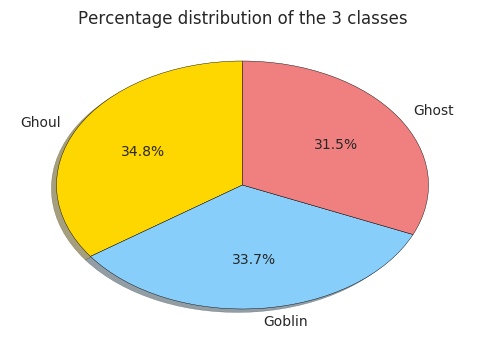

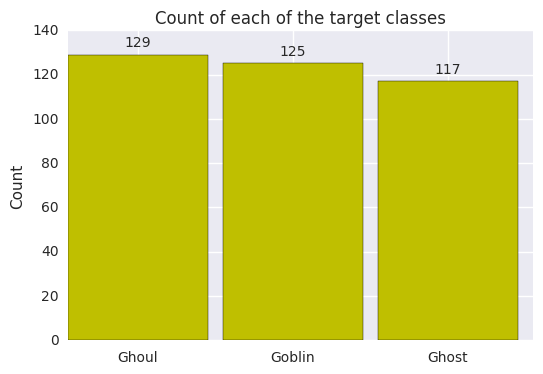

In [5]:
# create a pie chart and look at the percentage distribution #
type_series = train.type.value_counts()
labels = (np.array(type_series.index))
sizes = (np.array((type_series / type_series.sum())*100))
colors = ['gold', 'lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the 3 classes")
plt.show()

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

# create a bar chart to get the count of each classes #
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(type_series), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels)
ax.set_ylabel("Count")
ax.set_title("Count of each of the target classes")
autolabel(rects)
plt.show()

**Numerical variables exploration:**

Let us explore the correlation between the numerical variables present in the dataset.

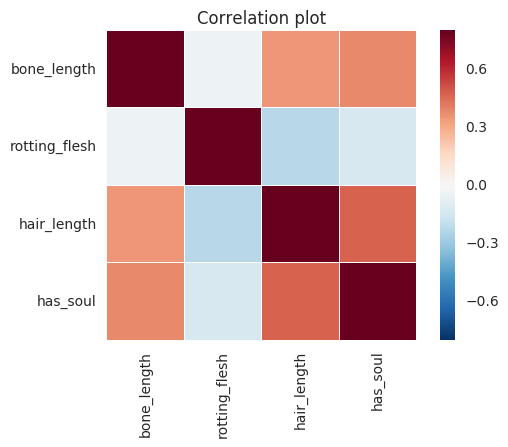

In [6]:
numerical_cols = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']
corrmat = train[numerical_cols].corr()
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=0.05)
plt.yticks(rotation='horizontal')
plt.title("Correlation plot")
plt.show()

Now let us see the bivariate distribution of these numerical variables. Thanks to this script.

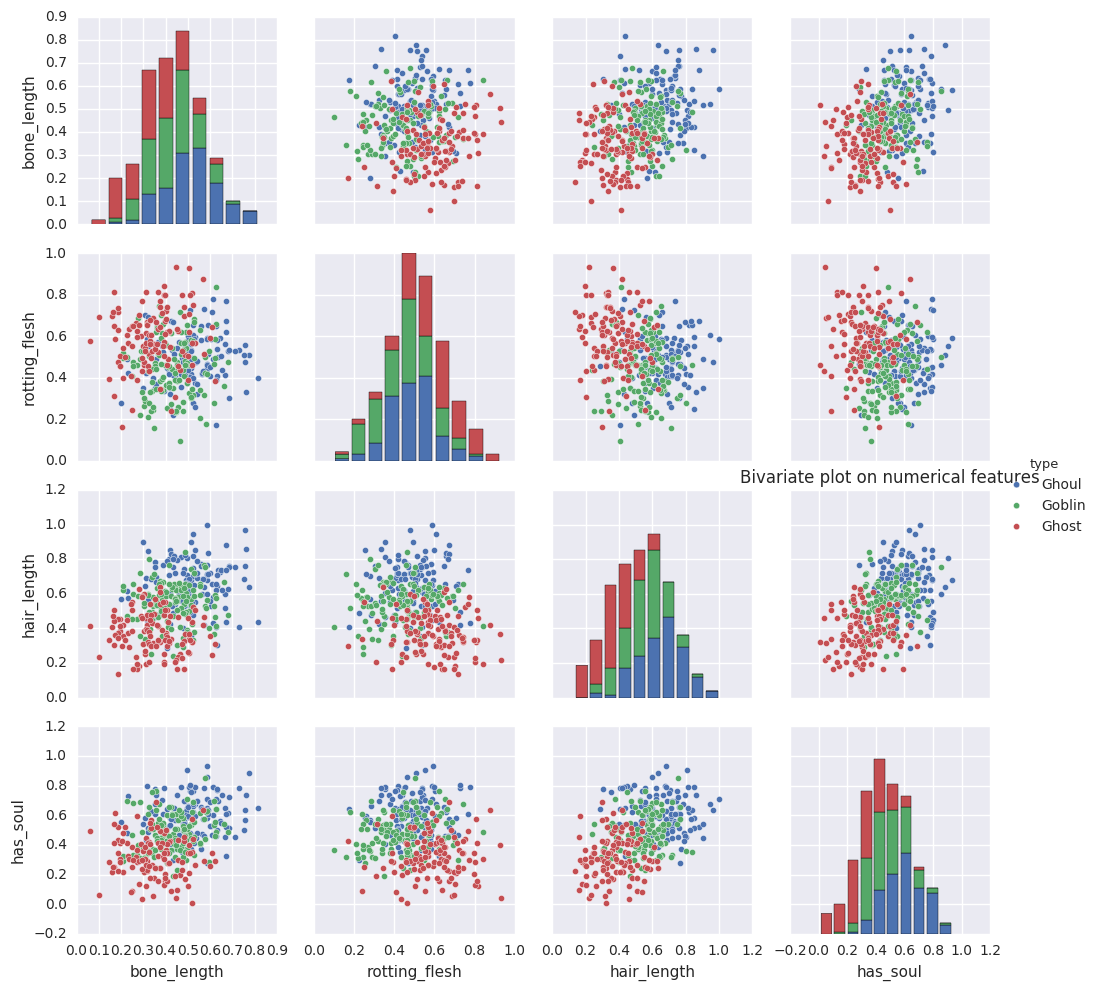

In [7]:
plt.figure(figsize=(12,12))
sns.pairplot(train[numerical_cols+['type']], hue="type")
plt.title("Bivariate plot on numerical features")
plt.show()

**Categorical variable exploration:**

Now let us look at the only categorical variable 'color' and see how each categories are distributed 

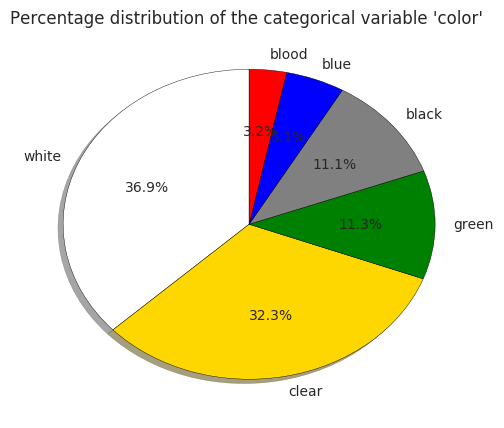

In [8]:
# create a pie chart and look at the percentage distribution #
type_series = train.color.value_counts()
labels = (np.array(type_series.index))
sizes = (np.array((type_series / type_series.sum())*100))
colors = ['white', 'gold', 'green', 'grey', 'blue', 'red']
plt.figure(figsize=(6,5))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Percentage distribution of the categorical variable 'color' ")
plt.show()

We can now see how the classes are distributed in each of the categories

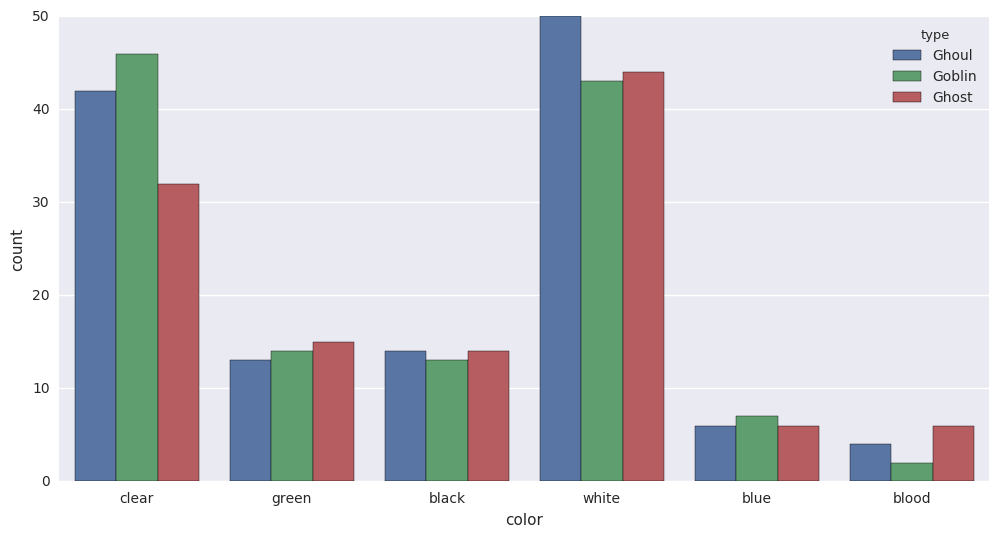

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='color', hue='type', data=train)
plt.show()

**Bivariate plots:**

Now let us look at the bi-variate plots of numerical variables with respect to the categorical variable

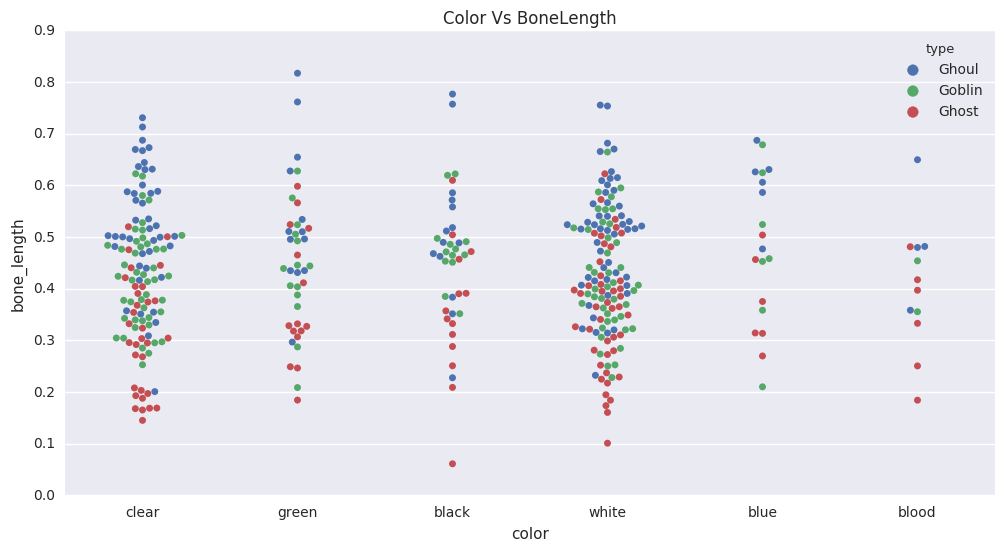

In [10]:
plt.figure(figsize=(12,6))
sns.swarmplot(x="color", y="bone_length", hue="type", data=train)
plt.title("Color Vs BoneLength")
plt.show()

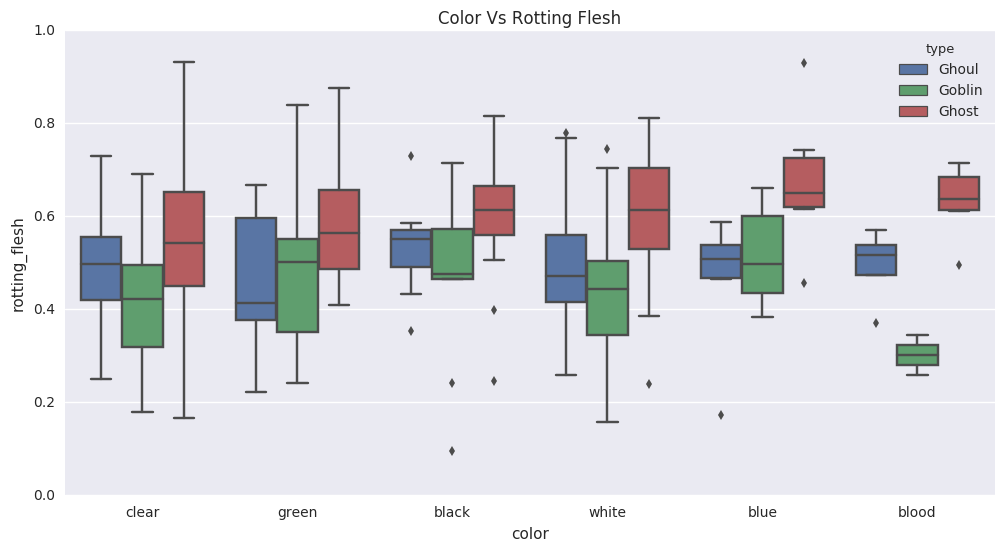

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x="color", y="rotting_flesh", hue="type", data=train)
plt.title("Color Vs Rotting Flesh")
plt.show()

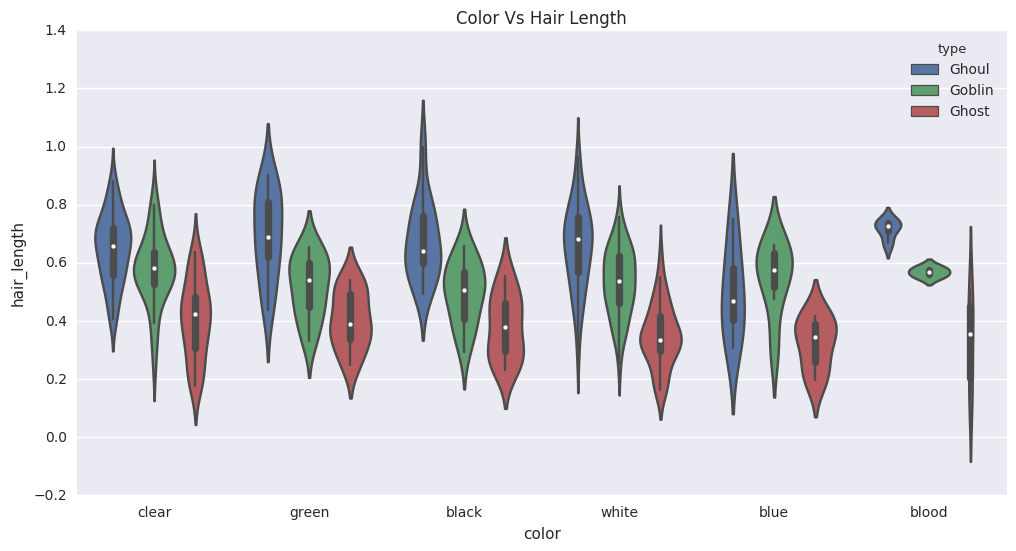

In [12]:
plt.figure(figsize=(12,6))
sns.violinplot(x="color", y="hair_length", hue="type", data=train)
plt.title("Color Vs Hair Length")
plt.show()

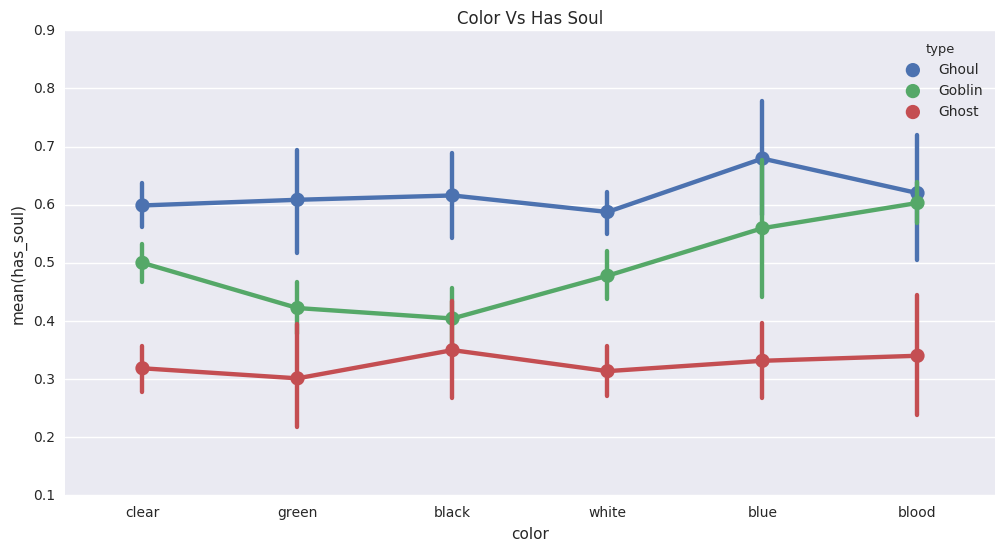

In [13]:
plt.figure(figsize=(12,6))
sns.pointplot(x="color", y="has_soul", hue="type", data=train)
plt.title("Color Vs Has Soul")
plt.show()

**t-SNE Visualisation:**

Now let us take the numerical variables and do a t-SNE visualisation on the same and see how the targets are separated.

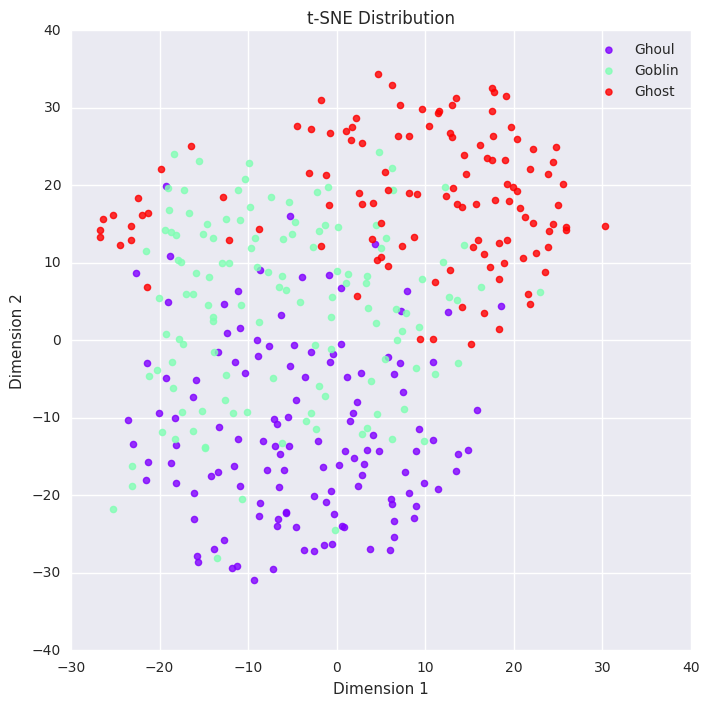

In [14]:
tsne = manifold.TSNE(n_components=2, random_state=0) 
X = np.array(train[numerical_cols])
X = tsne.fit_transform(X)
y = train.type.values

colors = cm.rainbow(np.linspace(0, 1, 3))
labels = ['Ghoul', 'Goblin', 'Ghost']
plt.figure(figsize=(8, 8))
for l, c, co, in zip(labels, colors, range(3)):
    plt.scatter(X[np.where(y == l), 0],
                X[np.where(y == l), 1],
                marker='o',
                color=c,
                linewidth='1',
                alpha=0.8,
                label=l)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE Distribution")
plt.legend(loc='best')
plt.show()

Hope this is helpful.!